<a href="https://colab.research.google.com/github/dharambirpoddar/RL_Bird/blob/main/DNN_Bird_controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Implementation

In [1]:
pip install numpy

In [2]:
pip install matplotlib

In [3]:
pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

**Converting GPS to XYZ**

In [5]:

def gps2xy(longitude,latitude):
  # Example Coordinates (Adjust these to your actual data)
  #latitude = 28.6129  # Example: Delhi, India
  #longitude = 77.2304

  # Define the source and target coordinate systems
  wgs84 = pyproj.CRS('EPSG:4326')  # Standard GPS coordinates

  # Determine UTM zone for your location in India
  # India covers multiple UTM zones (40-47)
  # Use a reference source (e.g., https://epsg.io/) to find the zone
  # for your specific coordinates. Here, we'll assume zone 46 for Delhi.
  utm_zone = 46

  # Construct the UTM CRS for India zone
  utm_crs = pyproj.CRS(f'EPSG:326{utm_zone}')

  # Create a transformation object
  transformer = pyproj.Transformer.from_crs(wgs84, utm_crs, always_xy=True)

  # Perform the transformation
  x, y = transformer.transform(longitude, latitude)

  #print(f"Indian UTM Coordinates (Zone {utm_zone}): X = {x:.2f}, Y = {y:.2f}")
  return [x,y]

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df_raw=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/dataMain2.csv')
df_raw

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,C2_Pitch,C3_Throttle,seq2,TimeUS2,GrX,GrY,GrZ,AcX,AcY,AcZ
0,198,17:34.2,179654476,45.08,-5.59,61.29,-12.06,22.555598,88.308273,1500,1500,987,176,179651838,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443
1,423,17:34.2,179697878,42.66,-4.62,60.23,-12.07,22.555598,88.308274,1500,1500,987,177,179651838,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314
2,649,17:34.3,179733964,40.29,-3.70,59.38,-12.07,22.555598,88.308274,1500,1500,987,282,179671952,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849
3,879,17:34.3,179774486,37.83,-2.72,58.68,-12.07,22.555598,88.308274,1500,1500,987,283,179671952,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950
4,1109,17:34.4,179841066,35.23,-1.15,58.16,-12.07,22.555598,88.308274,1500,1500,987,398,179693751,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351,18:16.2,221678836,-2.14,1.72,24.72,-1.70,22.555625,88.308345,1507,1501,1740,11454,190294706,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570
1050,40386,18:16.3,221717811,-0.84,-1.76,19.31,-1.70,22.555625,88.308345,1508,1500,1731,11455,190314541,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530
1051,40425,18:16.3,221758761,12.54,-2.35,14.11,-1.70,22.555625,88.308345,1508,1500,1724,11456,190314541,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740
1052,40460,18:16.3,221796964,27.96,1.52,12.23,-1.70,22.555625,88.308345,1508,1500,1724,11488,190334519,-0.655319,-0.476875,0.071297,5.924641,0.018187,-25.114600


In [8]:
df = df_raw.dropna()
#gps2xy(df['Lat'],df['Lng'])

#gps2xy(df['Lat'])
xx=[]
yy=[]
for i in range(df.shape[0]):
  x=df['Lng'][i]
  y=df['Lat'][i]
  gps2xy(x,y)
  xx.append(gps2xy(x,y)[0])
  yy.append(gps2xy(x,y)[1])




Ploting

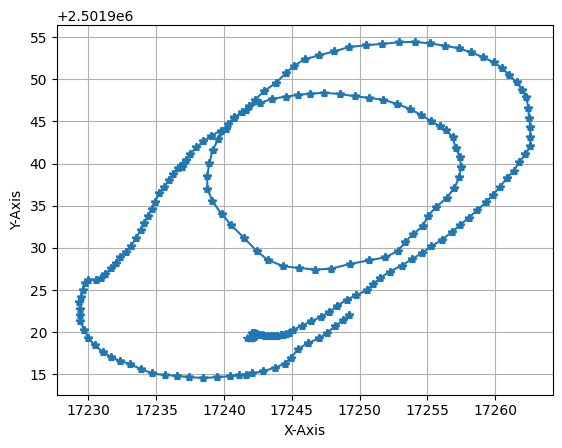

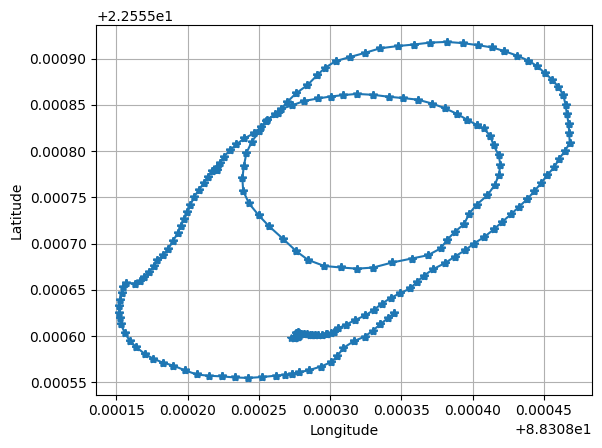

In [9]:
plt.plot(xx,yy,'*-')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid()
plt.show()
plt.plot(df['Lng'],df['Lat'],'*-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

Make State Variabes

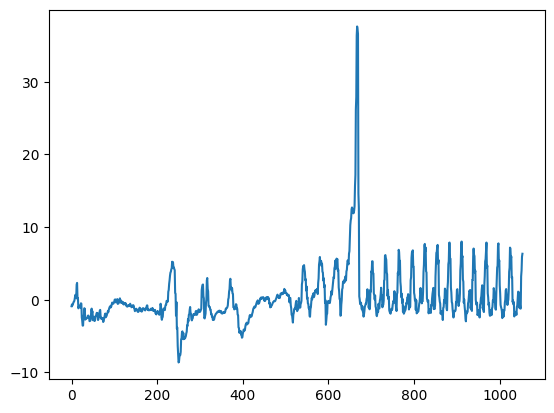

In [10]:
plt.plot(df['AcX'])

In [11]:
df.at[0, 'Roll'] = 45.01
xx = xx[:df.shape[0]]
yy = yy[:df.shape[0]]
df['x_axis'] = xx
df['y_axis'] = yy

df

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,...,seq2,TimeUS2,GrX,GrY,GrZ,AcX,AcY,AcZ,x_axis,y_axis
0,198,17:34.2,179654476,45.01,-5.59,61.29,-12.06,22.555598,88.308273,1500,...,176,179651838,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443,17241.686227,2.501919e+06
1,423,17:34.2,179697878,42.66,-4.62,60.23,-12.07,22.555598,88.308274,1500,...,177,179651838,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314,17241.881340,2.501919e+06
2,649,17:34.3,179733964,40.29,-3.70,59.38,-12.07,22.555598,88.308274,1500,...,282,179671952,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849,17241.881340,2.501919e+06
3,879,17:34.3,179774486,37.83,-2.72,58.68,-12.07,22.555598,88.308274,1500,...,283,179671952,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950,17241.881340,2.501919e+06
4,1109,17:34.4,179841066,35.23,-1.15,58.16,-12.07,22.555598,88.308274,1500,...,398,179693751,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775,17241.881340,2.501919e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351,18:16.2,221678836,-2.14,1.72,24.72,-1.70,22.555625,88.308345,1507,...,11454,190294706,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570,17249.209358,2.501922e+06
1050,40386,18:16.3,221717811,-0.84,-1.76,19.31,-1.70,22.555625,88.308345,1508,...,11455,190314541,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530,17249.209358,2.501922e+06
1051,40425,18:16.3,221758761,12.54,-2.35,14.11,-1.70,22.555625,88.308345,1508,...,11456,190314541,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740,17249.209358,2.501922e+06
1052,40460,18:16.3,221796964,27.96,1.52,12.23,-1.70,22.555625,88.308345,1508,...,11488,190334519,-0.655319,-0.476875,0.071297,5.924641,0.018187,-25.114600,17249.209358,2.501922e+06


**Max_Min Value**


In [12]:
Roll_max=45
Roll_min=-45
Pitch_min=-45
Pitch_max=45
Yaw_min=0
Yaw_max=360
C_min=900
C_max=2100


**Data Normalization**

In [13]:
df['Roll']=(df['Roll']-Roll_min)/(Roll_max-Roll_min)
df['Pitch']=(df['Pitch']-Pitch_min)/(Pitch_max-Pitch_min)
df['Yaw']=(df['Yaw']-Yaw_min)/(Yaw_max-Yaw_min)
df['C1_Roll']=(df['C1_Roll']-C_min)/(C_max-C_min)
df['C2_Pitch']=(df['C2_Pitch']-C_min)/(C_max-C_min)
df['C3_Throttle']=(df['C3_Throttle']-C_min)/(C_max-C_min)

In [14]:

df['Roll_diff']= df['Roll'].shift(-1) - df['Roll']
df['Pitch_diff'] = df['Pitch'].shift(-1) - df['Pitch']
df['Yaw_diff'] = df['Yaw'].shift(-1) - df['Yaw']
df['TimeUS_diff'] = df['TimeUS'].shift(-1) - df['TimeUS']
df['x_axis_diff'] = df['x_axis'].shift(-1) - df['x_axis']
df['y_axis_diff'] = df['y_axis'].shift(-1) - df['y_axis']
df['Alt_diff'] = df['Alt'].shift(-1) - df['Alt']

In [15]:
#offset
df['x_axis'] = df['x_axis']-df['x_axis'].min()
df['y_axis'] = df['y_axis']-df['y_axis'].min()
df['Alt'] = df['Alt']-df['Alt'].min()
df['TimeUS'] = df['TimeUS']-df['TimeUS'].min()

df.dropna(inplace=True)
df

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,...,AcZ,x_axis,y_axis,Roll_diff,Pitch_diff,Yaw_diff,TimeUS_diff,x_axis_diff,y_axis_diff,Alt_diff
0,198,17:34.2,0,1.000111,0.437889,0.170250,5.10,22.555598,88.308273,0.500000,...,-7.713443,12.338990,4.718225,-0.026111,0.010778,-0.002944,43402.0,0.195114,-0.028356,-0.01
1,423,17:34.2,43402,0.974000,0.448667,0.167306,5.09,22.555598,88.308274,0.500000,...,-8.110314,12.534104,4.689870,-0.026333,0.010222,-0.002361,36086.0,0.000000,0.000000,0.00
2,649,17:34.3,79488,0.947667,0.458889,0.164944,5.09,22.555598,88.308274,0.500000,...,-8.229849,12.534104,4.689870,-0.027333,0.010889,-0.001944,40522.0,0.000000,0.000000,0.00
3,879,17:34.3,120010,0.920333,0.469778,0.163000,5.09,22.555598,88.308274,0.500000,...,-8.458950,12.534104,4.689870,-0.028889,0.017444,-0.001444,66580.0,0.000000,0.000000,0.00
4,1109,17:34.4,186590,0.891444,0.487222,0.161556,5.09,22.555598,88.308274,0.500000,...,-8.509775,12.534104,4.689870,-0.015000,-0.001111,-0.001556,71659.0,0.084194,0.052883,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,40309,18:16.2,41981884,0.563333,0.586000,0.081500,15.27,22.555619,88.308340,0.506667,...,-24.516720,19.410410,6.839135,-0.087111,-0.066889,-0.012833,42476.0,0.451711,0.585544,0.19
1049,40351,18:16.2,42024360,0.476222,0.519111,0.068667,15.46,22.555625,88.308345,0.505833,...,-25.578570,19.862121,7.424679,0.014444,-0.038667,-0.015028,38975.0,0.000000,0.000000,0.00
1050,40386,18:16.3,42063335,0.490667,0.480444,0.053639,15.46,22.555625,88.308345,0.506667,...,-33.076530,19.862121,7.424679,0.148667,-0.006556,-0.014444,40950.0,0.000000,0.000000,0.00
1051,40425,18:16.3,42104285,0.639333,0.473889,0.039194,15.46,22.555625,88.308345,0.506667,...,-31.800740,19.862121,7.424679,0.171333,0.043000,-0.005222,38203.0,0.000000,0.000000,0.00


In [16]:
#Rearrange Coloumn Dataframe
df=df[['TimeUS_diff','Roll','Pitch','Yaw','x_axis','y_axis','Alt','C1_Roll','C2_Pitch','C3_Throttle']]

#df['vx']=df['AcX']*df['TimeUS_diff']

In [17]:
np.mean((df['TimeUS_diff']))

40059.282051282054

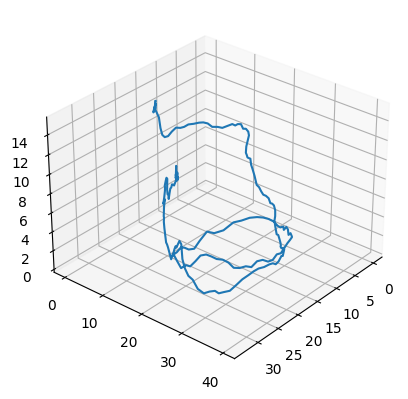

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Your data loading code
x = df['x_axis']
y = df['y_axis']
z = df['Alt']

# Create the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot your 3D line
ax.plot(x, y, z, label='3D Line')


def change_view(elevation, azimuth):
    ax.view_init(elev=elevation, azim=azimuth)
    fig.canvas.draw_idle()

# Example: Change to a specific view
change_view(30, 40)

# Show the plot
plt.show()

**Learning**

In [19]:

#X = df[['TimeUS_diff','Roll','Roll_diff','Pitch','Pitch_diff','Yaw','Yaw_diff','x_axis','x_axis_diff','y_axis','y_axis_diff','Alt','Alt_diff']]
X = df[['TimeUS_diff','Roll','Pitch','Yaw','x_axis','y_axis','Alt']]
y = df[['C1_Roll','C2_Pitch','C3_Throttle']]


In [63]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#time Series Split
training_size=int(len(df)*0.65)
X_train,X_test=df.loc[:training_size,['TimeUS_diff','Roll','Pitch','Yaw','x_axis','y_axis','Alt']],df.loc[training_size:,['TimeUS_diff','Roll','Pitch','Yaw','x_axis','y_axis','Alt']]
y_train,y_test=df.loc[:training_size,['C1_Roll','C2_Pitch','C3_Throttle']],df.loc[training_size:,['C1_Roll','C2_Pitch','C3_Throttle']]

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(685, 7)
(685, 3)
(369, 7)
(369, 3)


In [106]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))  # Input layer, 32 neurons
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden Layer
model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons (matching your output parameters)


In [92]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


Epoch 1/1000
6/6 [==============================] - 1s 45ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2524 - accuracy: 0.2321 - val_loss: 0.1766 - val_accuracy

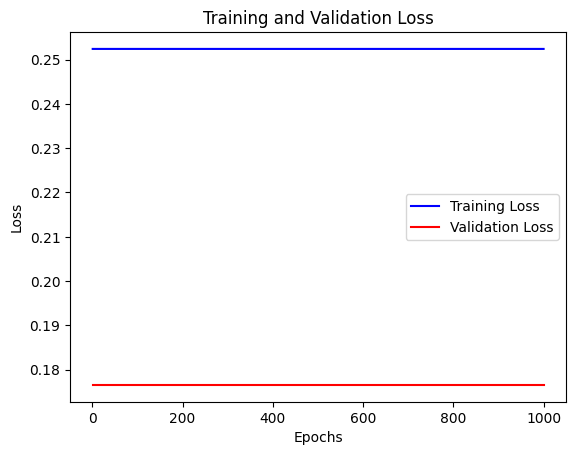

In [93]:
history=model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))


training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)  # Assuming you trained for 1000 epochs

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                256       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3459 (13.51 KB)
Trainable params: 3459 (13.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.17656821012496948
Test accuracy: 0.0


In [96]:
X_new=[[40000,0.4,0.2,0.5,0.4,0.2,0.3]]
predictions = model.predict(X_new)
print(predictions)

1/1 [==============================] - 0s 118ms/step
[[1. 1. 1.]]


# offSet Trajectory

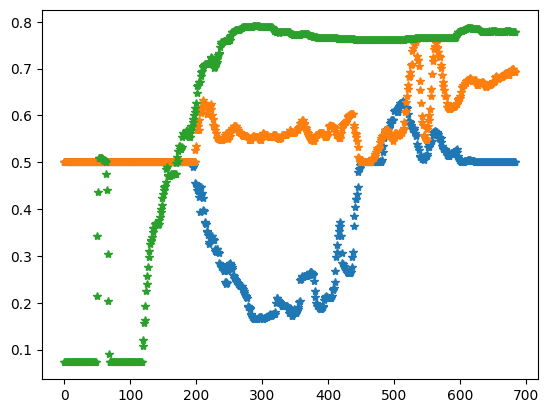

In [97]:
#df
#X_train
#y_train
plt.plot(y_train,'*')

# Testing Curves



Spiral

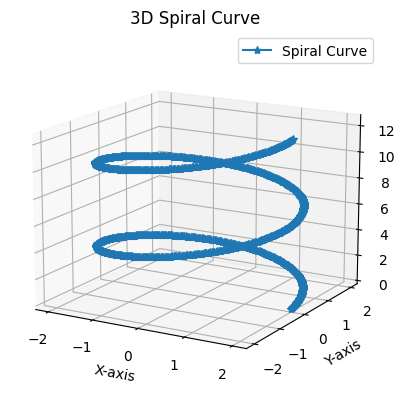

In [98]:


# Define parameters for the spiral
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b * theta

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Spiral Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)  # Example view angles

plt.show()



In [99]:
df_sp=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_sp['x_ax']=x
df_sp['y_ax']=y
df_sp['Alt']=z
df_sp['TimeUS']=40000 #0.04 seconds data aquation rate
df_sp['Roll']=0
df_sp['Pitch']=0.5
df_sp['Yaw']=0.5
df_sp


,TimeUS,Roll,Pitch,Yaw,x_ax,y_ax,Alt
0,40000,0,0.5,0.5,2.000000,0.000000e+00,0.000000
1,40000,0,0.5,0.5,1.999842,2.515724e-02,0.012579
2,40000,0,0.5,0.5,1.999367,5.031049e-02,0.025158
3,40000,0,0.5,0.5,1.998576,7.545579e-02,0.037737
4,40000,0,0.5,0.5,1.997469,1.005891e-01,0.050316
...,...,...,...,...,...,...,...
995,40000,0,0.5,0.5,1.997469,-1.005891e-01,12.516055
996,40000,0,0.5,0.5,1.998576,-7.545579e-02,12.528634
997,40000,0,0.5,0.5,1.999367,-5.031049e-02,12.541213
998,40000,0,0.5,0.5,1.999842,-2.515724e-02,12.553792


32/32 [==============================] - 0s 3ms/step
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


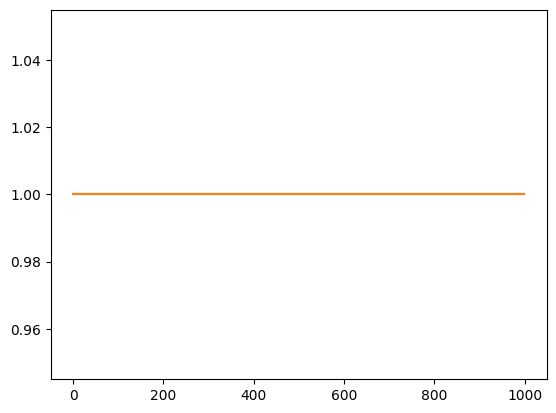

In [100]:
predictions = model.predict(df_sp)
print(predictions)
plt.plot(predictions[:,0])
plt.plot(predictions[:,1])
#plt.plot(predictions[:,2])

Circle

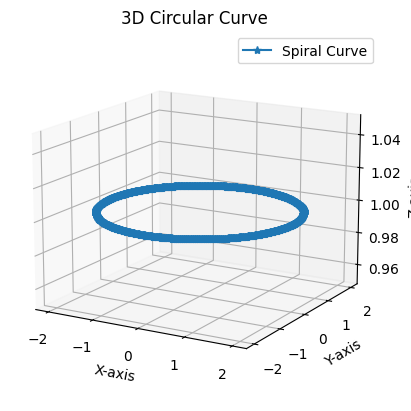

In [101]:

theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)

plt.show()

sine curve

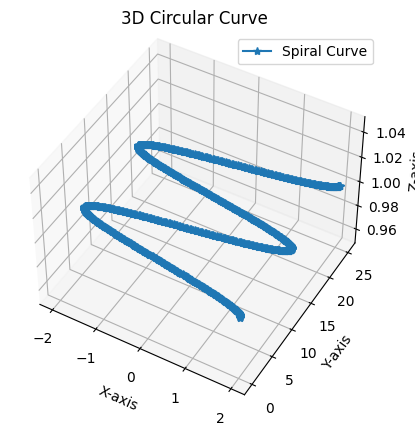

In [102]:
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * theta
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=45, azim=-60)  # Example view angles

plt.show()

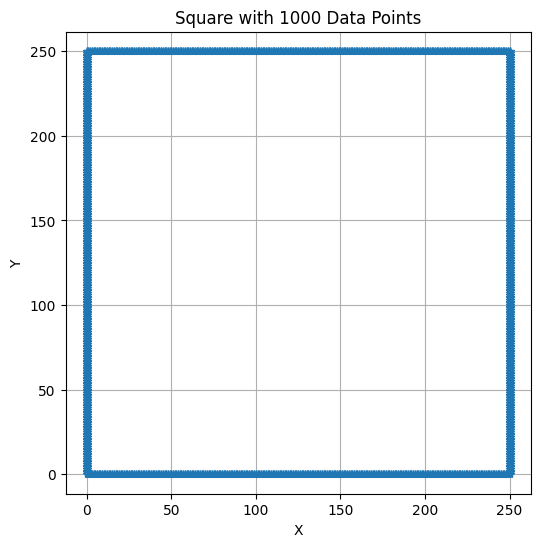

In [103]:
import matplotlib.pyplot as plt

# Define the size of the square
side_length = 250  # Adjust as needed

# Generate the coordinates for the square
x = []
y = []

# Top side
x.extend(range(0, side_length))
y.extend([0] * side_length)

# Right side
x.extend([side_length] * side_length)
y.extend(range(0, side_length))

# Bottom side
x.extend(range(side_length, 0, -1))
y.extend([side_length] * side_length)

# Left side
x.extend([0] * side_length)
y.extend(range(side_length, 0, -1))

# Plot the square
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.plot(x, y,'*')  # 'bo' for blue circles, you can change marker style and color
plt.title('Square with 1000 Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # Ensure aspect ratio is equal
plt.grid(True)
plt.show()


In [104]:

df_s=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_s['x_ax']=x
df_s['y_ax']=y
df_s['Alt']=1
df_s['TimeUS']=40000 #0.04 seconds data aquation rate
df_s['Roll']=0
df_s['Pitch']=0
df_s['Yaw']=0

df_s.at[250, 'Yaw'] = 0.25
df_s.at[500, 'Yaw'] = 0.25
df_s.at[750, 'Yaw'] = 0.25

df_s
predictions = model.predict(df_s)
print(predictions)


32/32 [==============================] - 0s 2ms/step
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


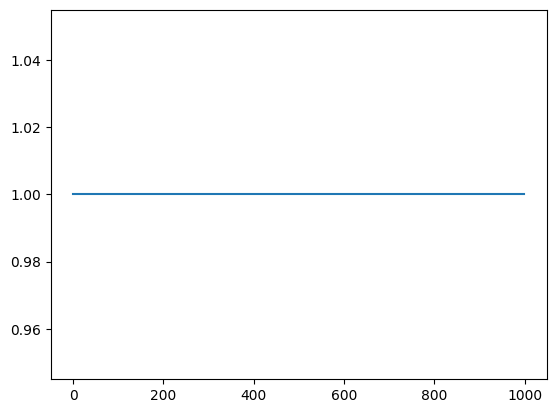

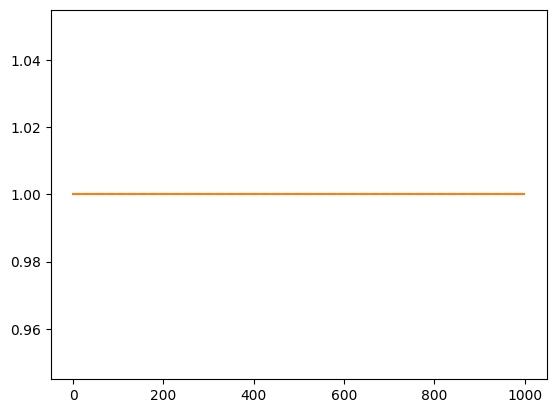

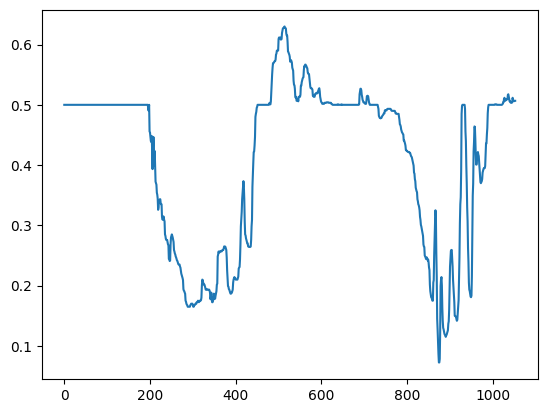

In [105]:
plt.plot(predictions[:,0],'-')
plt.show()
plt.plot(predictions[:,1],'--')
plt.plot(predictions[:,2])
plt.show()
plt.plot(df['C1_Roll'])